In [33]:
import numpy as np
import matplotlib.pyplot as plt

def init_poids():
    return np.ones(20)

def fonction_eval_sigmoide(x):
    return (1 / (1 + np.exp(-x))) * 100

def fonction_eval_heavyside(x):
    return 1 if x > 0 else 0

In [34]:
def propagation_sigmoide(entre, poids_a, poids_c):
    if entre == "A":
        entre = [1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1]
    else:
        entre = [1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1]

    longueur = len(entre) if len(entre) == len(poids_a) and len(entre) == len(poids_c) else -1
    if longueur == -1:
        return -1, print(len(entre), len(poids_a), len(poids_c))

    somme_perceptron_a = sum(poids_a[i] * entre[i] for i in range(longueur))
    somme_perceptron_c = sum(poids_c[i] * entre[i] for i in range(longueur))

    pourcentage_a = fonction_eval_sigmoide(somme_perceptron_a)
    pourcentage_c = fonction_eval_sigmoide(somme_perceptron_c)

    return pourcentage_a, pourcentage_c
    
def apprentissage(entre, target_a, target_c, poids_a, poids_c, mu=0.1):
    pourcentage_a, pourcentage_c = propagation_sigmoide(entre, poids_a, poids_c)
    
    y_a = pourcentage_a / 100
    y_c = pourcentage_c / 100
    
    erreur_a = target_a - y_a
    erreur_c = target_c - y_c
    
    if entre == "A":
        entre = [1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1]
    else:
        entre = [1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1]

    for i in range(len(entre)):
        poids_a[i] += mu * erreur_a * entre[i]
        poids_c[i] += mu * erreur_c * entre[i]

poids_a = init_poids()
poids_c = init_poids()

for i in range(100):
    apprentissage("A", target_a=1, target_c=0, poids_a=poids_a, poids_c=poids_c)
    apprentissage("C", target_a=0, target_c=1, poids_a=poids_a, poids_c=poids_c)

print(propagation_sigmoide("A", poids_a, poids_c))
print(propagation_sigmoide("C", poids_a, poids_c))

(np.float64(97.82479094282994), np.float64(2.8063238558633543))
(np.float64(2.4518056398425503), np.float64(96.86279947861767))


(1, 0)
(0, 1)


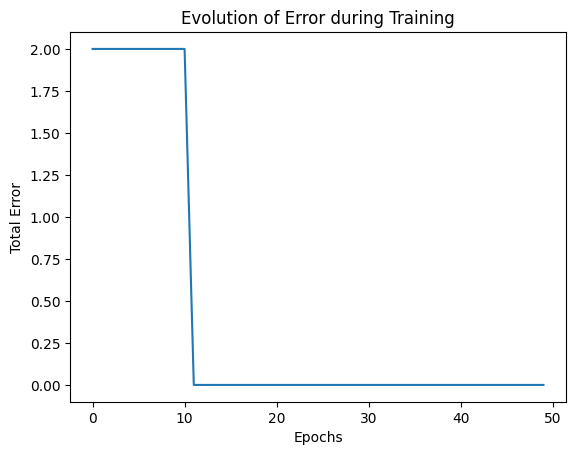

In [37]:
def propagation(entre, poids_a, poids_c):
    if entre == "A":
        entre = [1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1]
    else:
        entre = [1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1]

    longueur = len(entre) if len(entre) == len(poids_a) and len(entre) == len(poids_c) else -1
    if longueur == -1:
        return -1, print(len(entre), len(poids_a), len(poids_c))

    somme_perceptron_a = sum(poids_a[i] * entre[i] for i in range(longueur))
    somme_perceptron_c = sum(poids_c[i] * entre[i] for i in range(longueur))

    sortie_a = fonction_eval_heavyside(somme_perceptron_a)
    sortie_c = fonction_eval_heavyside(somme_perceptron_c)

    return sortie_a, sortie_c

def apprentissage(entre, target_a, target_c, poids_a, poids_c, mu=0.1):
    sortie_a, sortie_c = propagation(entre, poids_a, poids_c)
    
    erreur_a = target_a - sortie_a
    erreur_c = target_c - sortie_c
    
    if entre == "A":
        entre = [1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1]
    else:
        entre = [1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1]

    for i in range(len(entre)):
        poids_a[i] += mu * erreur_a * entre[i]
        poids_c[i] += mu * erreur_c * entre[i]

    return abs(erreur_a) + abs(erreur_c)

poids_a = init_poids()
poids_c = init_poids()

errors = []
epochs = 50

for i in range(epochs):
    erreur_a = apprentissage("A", target_a=1, target_c=0, poids_a=poids_a, poids_c=poids_c)
    erreur_c = apprentissage("C", target_a=0, target_c=1, poids_a=poids_a, poids_c=poids_c)
    
    total_error = erreur_a + erreur_c
    errors.append(total_error)

print(propagation("A", poids_a, poids_c))
print(propagation("C", poids_a, poids_c))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Total Error')
plt.title('Evolution of Error during Training (Heavyside)')
plt.show()

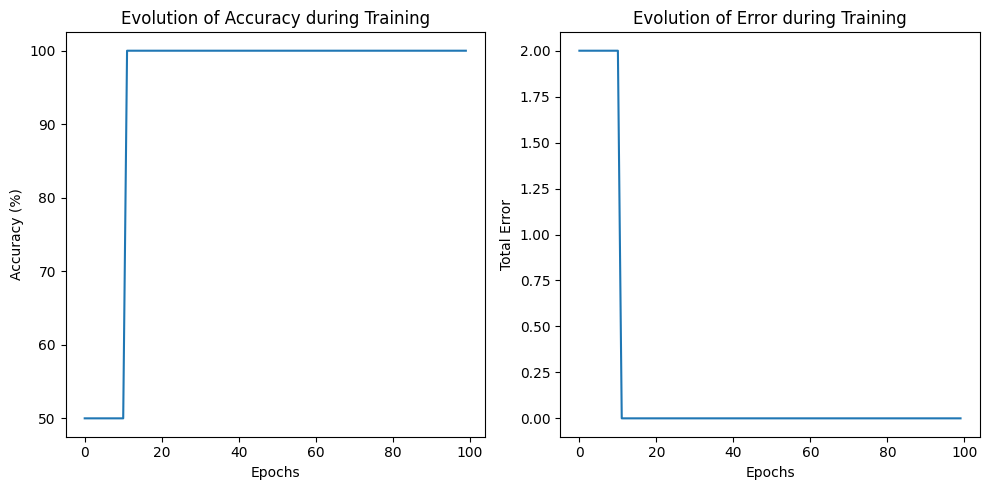

In [40]:
def calculate_accuracy(poids_a, poids_c):
    correct_classifications = 0
    total_classifications = 4

    sortie_a, sortie_a_bis = propagation("A", poids_a, poids_c)
    if sortie_a == 1:
        correct_classifications += 1
    
    if sortie_a_bis == 0:
        correct_classifications += 1

    sorti_c_bis, sortie_c = propagation("C", poids_a, poids_c)
    if sortie_c == 1:
        correct_classifications += 1
    
    if sorti_c_bis == 0:
        correct_classifications += 1

    return (correct_classifications / total_classifications) * 100

poids_a = init_poids()
poids_c = init_poids()

accuracies = []
errors = []
epochs = 100

for i in range(epochs):
    accuracy = calculate_accuracy(poids_a, poids_c)
    accuracies.append(accuracy)

    total_error = apprentissage("A", target_a=1, target_c=0, poids_a=poids_a, poids_c=poids_c)
    total_error += apprentissage("C", target_a=0, target_c=1, poids_a=poids_a, poids_c=poids_c)
    
    errors.append(total_error)
    
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.plot(accuracies)
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Evolution of Accuracy during Training')

plt.subplot(1, 2, 2)
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Total Error')
plt.title('Evolution of Error during Training')

plt.tight_layout()
plt.show()

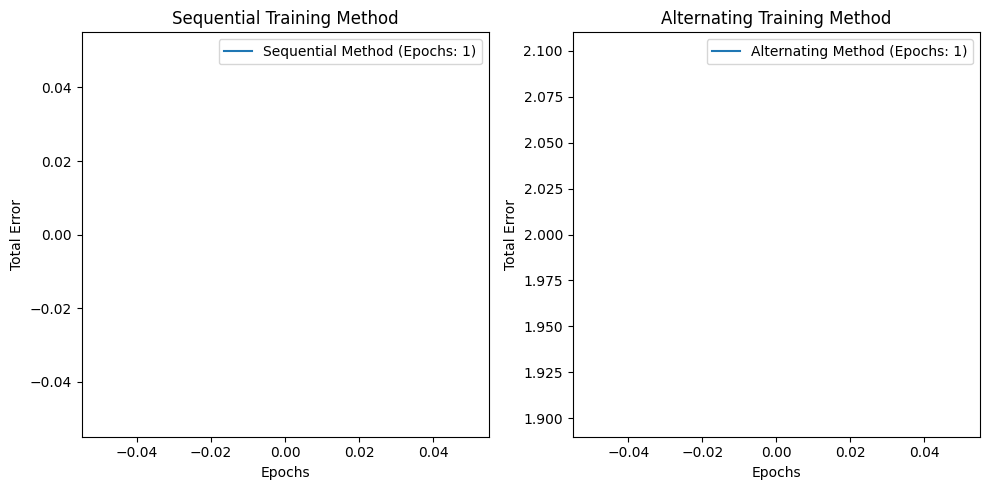

In [41]:
# Method 1
def train_sequential(poids_a, poids_c, mu=0.1):
    errors = []
    epochs = 0
    
    while True:
        total_error = 0

        while propagation("A", poids_a, poids_c)[0] != 1:
            total_error += apprentissage("A", target_a=1, target_c=0, poids_a=poids_a, poids_c=poids_c, mu=mu)

        while propagation("C", poids_a, poids_c)[1] != 1:
            total_error += apprentissage("C", target_a=0, target_c=1, poids_a=poids_a, poids_c=poids_c, mu=mu)

        errors.append(total_error)
        epochs += 1

        if propagation("A", poids_a, poids_c)[0] == 1 and propagation("C", poids_a, poids_c)[1] == 1:
            break

    return errors, epochs

# Method 2
def train_alternate(poids_a, poids_c, mu=0.1):
    errors = []
    epochs = 0
    
    while True:
        total_error = 0
        
        total_error += apprentissage("A", target_a=1, target_c=0, poids_a=poids_a, poids_c=poids_c, mu=mu)
        
        total_error += apprentissage("C", target_a=0, target_c=1, poids_a=poids_a, poids_c=poids_c, mu=mu)

        errors.append(total_error)
        epochs += 1

        if propagation("A", poids_a, poids_c)[0] == 1 and propagation("C", poids_a, poids_c)[1] == 1:
            break

    return errors, epochs

poids_a_seq = init_poids()
poids_c_seq = init_poids()

poids_a_alt = init_poids()
poids_c_alt = init_poids()

errors_seq, epochs_seq = train_sequential(poids_a_seq, poids_c_seq)

errors_alt, epochs_alt = train_alternate(poids_a_alt, poids_c_alt)

plt.figure(figsize=(10, 5))

# Le résultat est compréhensible via le fait que j'initialise les poids à 1 et aussi parce que je ne fais pas plusieurs vérification du style dés que c'est = 1 alors le training est fini
plt.subplot(1, 2, 1)
plt.plot(errors_seq, label=f'Sequential Method (Epochs: {epochs_seq})')
plt.xlabel('Epochs')
plt.ylabel('Total Error')
plt.title('Sequential Training Method')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(errors_alt, label=f'Alternating Method (Epochs: {epochs_alt})')
plt.xlabel('Epochs')
plt.ylabel('Total Error')
plt.title('Alternating Training Method')
plt.legend()

plt.tight_layout()
plt.show()



98.36975006285591
24.973989440488268
98.36975006285591
24.973989440488268
98.36975006285591
24.973989440488268
98.36975006285591
24.973989440488268
98.36975006285591
24.973989440488268
98.36975006285591
24.973989440488268
98.36975006285591
24.973989440488268
98.36975006285591
24.973989440488268
98.36975006285591
24.973989440488268
98.36975006285591
24.973989440488268
98.36975006285591
24.973989440488268
98.36975006285591
24.973989440488268
98.36975006285591
24.973989440488268
98.36975006285591
24.973989440488268
98.36975006285591
24.973989440488268
98.36975006285591
24.973989440488268
98.36975006285591
24.973989440488268
98.36975006285591
24.973989440488268
98.36975006285591
24.973989440488268
98.36975006285591
24.973989440488268
98.36975006285591
24.973989440488268
98.36975006285591
24.973989440488268
98.36975006285591
24.973989440488268
98.36975006285591
24.973989440488268
98.36975006285591
24.973989440488268
98.36975006285591
24.973989440488268
98.36975006285591
24.973989440488268
9

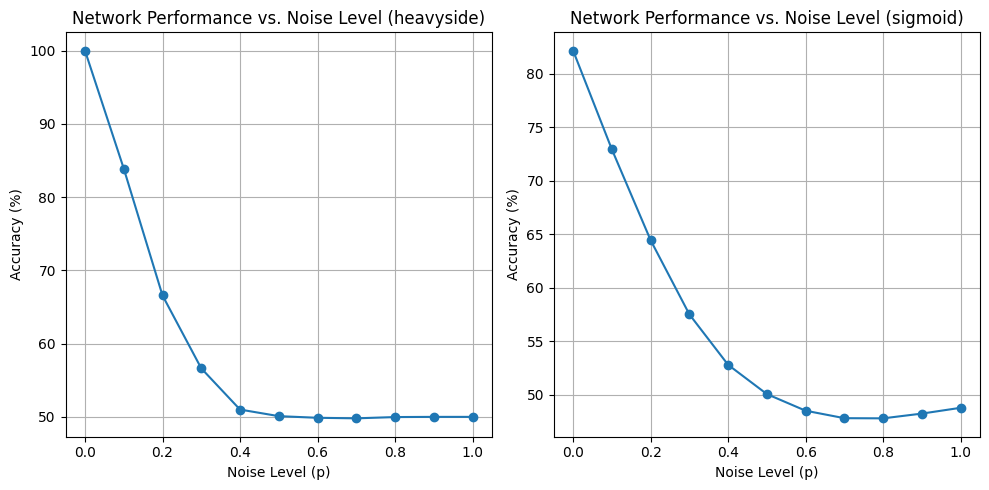

In [77]:
def propagation(entre, poids_a, poids_c):
    somme_perceptron_a = sum(poids_a[i] * entre[i] for i in range(len(entre)))
    somme_perceptron_c = sum(poids_c[i] * entre[i] for i in range(len(entre)))

    sortie_a = fonction_eval_heavyside(somme_perceptron_a)
    sortie_c = fonction_eval_heavyside(somme_perceptron_c)

    return sortie_a, sortie_c

def propagation_sigmoide(entre, poids_a, poids_c):
    somme_perceptron_a = sum(poids_a[i] * entre[i] for i in range(len(entre)))
    somme_perceptron_c = sum(poids_c[i] * entre[i] for i in range(len(entre)))

    sortie_a = fonction_eval_sigmoide(somme_perceptron_a)
    sortie_c = fonction_eval_sigmoide(somme_perceptron_c)
    
    print(sortie_a)

    return sortie_a, sortie_c

def add_noise(entre, p):
    entre_bruitee = entre.copy()
    for i in range(len(entre_bruitee)):
        if np.random.rand() < p:
            entre_bruitee[i] = 1 - entre_bruitee[i]
    return entre_bruitee

def evaluate_noise_performance(poids_a, poids_c, p, iterations=1000):
    correct_classifications = 0
    total_classifications = iterations * 4

    for _ in range(iterations):
        noisy_A = add_noise([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1], p)
        noisy_C = add_noise([1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1], p)

        sortie_a, sortie_a_bis = propagation(noisy_A, poids_a, poids_c)
        if sortie_a == 1:
            correct_classifications += 1
            
        if sortie_a_bis == 0:
            correct_classifications += 1

        sortie_c_bis, sortie_c = propagation(noisy_C, poids_a, poids_c)
        if sortie_c == 1:
            correct_classifications += 1
            
        if sortie_c_bis == 0:
            correct_classifications += 1

    return (correct_classifications / total_classifications) * 100

def evaluate_noise_performance_sigmoide(poids_a, poids_c, p, iterations=1000):
    correct_classifications = 0
    total_classifications = iterations * 4

    for _ in range(iterations):
        noisy_A = add_noise([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1], p)
        noisy_C = add_noise([1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1], p)

        sortie_a, sortie_a_bis = propagation_sigmoide(noisy_A, poids_a, poids_c)
        
        correct_classifications += sortie_a/100
        
        correct_classifications += 1 - (sortie_a_bis/100)

        sortie_c_bis, sortie_c = propagation_sigmoide(noisy_C, poids_a, poids_c)
        
        correct_classifications += sortie_c/100
        
        correct_classifications += 1 - (sortie_c_bis/100)

    return (correct_classifications / total_classifications) * 100

performance_noise_heavyside = []
performance_noise_sigmoide = []

noise_levels = np.linspace(0, 1, 11)

for p in noise_levels:
    accuracy_heavyside = evaluate_noise_performance(poids_a, poids_c, p)
    performance_noise_heavyside.append(accuracy_heavyside)
    
    accuracy_sigmoide = evaluate_noise_performance_sigmoide(poids_a, poids_c, p)
    performance_noise_sigmoide.append(accuracy_sigmoide)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(noise_levels, performance_noise_heavyside, marker='o')
plt.xlabel('Noise Level (p)')
plt.ylabel('Accuracy (%)')
plt.title('Network Performance vs. Noise Level (heavyside)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(noise_levels, performance_noise_sigmoide, marker='o')
plt.xlabel('Noise Level (p)')
plt.ylabel('Accuracy (%)')
plt.title('Network Performance vs. Noise Level (sigmoid)')
plt.grid(True)

plt.tight_layout()
plt.savefig('noise_performance.png')
plt.show()